<a href="https://colab.research.google.com/github/aman20119/supervisedinternship/blob/master/supervisedlearningthesparkfoundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUPERVISED LEARNING -------***---- DATASET CREDIT=THE SPARK FOUNDATIONS

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
urdata = 'http://bit.ly/w-data'

In [6]:
df = pd.read_csv(urdata)

In [7]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.shape

(25, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


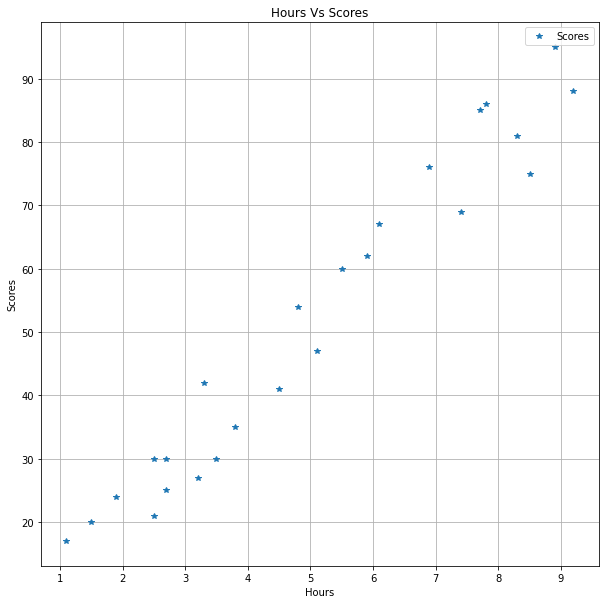

In [12]:
df.plot(x="Hours", y="Scores", style= '*', figsize = (10,10));
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

In [15]:
a = df.iloc[:, :-1].values
b = df.iloc[:,1].values
a
b

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [16]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b, test_size= 0.2, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(a_train,b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

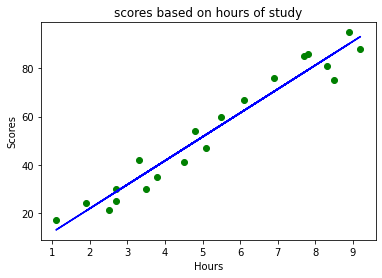

In [20]:
plt.scatter(a_train,b_train,color="green");
plt.plot(a_train,linreg.predict(a_train), color="blue");
plt.title("scores based on hours of study")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

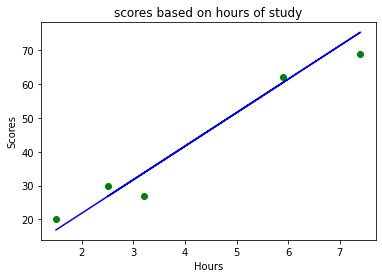

In [22]:
plt.scatter(a_test,b_test,color="green");
plt.plot(a_test,linreg.predict(a_test), color="blue");
plt.title("scores based on hours of study")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [23]:
print(a_test)
b_pred = linreg.predict(a_test)
b_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
df_ = pd.DataFrame({"ActualValue":b_test, "Predictions":b_pred})
df_

,ActualValue,Predictions
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
test_hrs = 9.0
print("student studied: ",test_hrs)
print("score prediction: ",linreg.predict(np.array(test_hrs).reshape(1,-1))[0])

student studied:  9.0
score prediction:  91.21406836721482
